# Combinatorics

In [1]:
# Settings and imports.
%matplotlib inline
from collections import Counter, OrderedDict, defaultdict
from functools import partial
from itertools import count
import math
from math import sqrt
from random import random
from time import time
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageColor
import seaborn as sns

#sns.set()
#sns.set_context('paper', font_scale=2.0)

-----

# A) Permu/Combi/Variations

In [4]:
def print_permutations(items, prefix=''):
    if not items:
        print(prefix)
        return
    for i, item in enumerate(items):
        print_permutations(items[:i] + items[i+1:], prefix+item)
    
print_permutations('ABC')

ABC
ACB
BAC
BCA
CAB
CBA


In [6]:
def print_combinations(items, k, prefix=''):
    if k == 0:
        print(prefix)
    if k > 0 and items:
        for i, item in enumerate(items):
            print_combinations(items[i+1:], k-1, prefix+item)
    
print_combinations('ABCD', 2)
# TODO: another approach: for first item: take it or not (two branches)

AB
AC
AD
BC
BD
CD


In [7]:
def print_combinations_with_replacement(items, k, prefix=''):
    if k == 0:
        print(prefix)
    if k > 0 and items:
        for i, item in enumerate(items):
            print_combinations_with_replacement(items[i:], k-1, prefix+item)
    
print_combinations_with_replacement('ABCD', 2)

AA
AB
AC
AD
BB
BC
BD
CC
CD
DD


In [9]:
def print_variations(items, k, prefix=''):
    if k == 0:
        print(prefix)
        return
    for i, item in enumerate(items):
        print_variations(items[:i] + items[i+1:], k-1, prefix+item)
    
print_variations('ABCD', 2)

AB
AC
AD
BA
BC
BD
CA
CB
CD
DA
DB
DC


In [11]:
def print_variations_with_replacement(items, k, prefix=''):
    if k == 0:
        print(prefix)
        return
    for i, item in enumerate(items):
        print_variations_with_replacement(items, k-1, prefix+item)
    
print_variations_with_replacement('ABC', 2)

AA
AB
AC
BA
BB
BC
CA
CB
CC


# TODO

* graf: pro ktere kombinace n, k je vetsi pocet komb. s opakovani a kdy variace

# Pascal Triangle

TODO: alternativni moznosti vizualizace (napr. matplotlib)

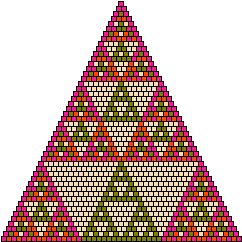

In [63]:
def compute_pascal_triangle(n, d):
    triangle = [[1]]
    for i_row in range(n-1):
        prev_left = triangle[-1] + [0]
        prev_right = [0] + triangle[-1]
        new_row = [(l + r) % d for l, r in zip(prev_left, prev_right)]
        triangle.append(new_row)
    return triangle

def show_pascal_triangle(n, d, sqwidth=5):
    triangle = compute_pascal_triangle(n, d)
    size = n * sqwidth + 2
    im = Image.new('RGB', (size, size), color='white')
    draw = ImageDraw.Draw(im)
    colormap = list(ImageColor.colormap)
    for i_row, row in enumerate(triangle):
        row_left = sqwidth * (n - i_row - 1) / 2
        top = i_row * sqwidth + 1
        bottom = top + sqwidth
        for i_col, value in enumerate(row):
            left = row_left + i_col * sqwidth + 1
            right = left + sqwidth
            draw.rectangle(
                [left, top, right, bottom],
                outline='black', fill=colormap[value])
    return im

show_pascal_triangle(n=48, d=4)

# Approximating $\pi$

TODO: at least one more method

In [83]:
def pi_leibnitz(duration=1):
    start = time()
    pi = 0
    for k in count(0):
        sign = 1 if k % 2 == 0 else -1
        term = 4 * sign / (2*k + 1)
        pi += term
        if time() > start + duration:
            return pi

pi_leibnitz()

3.1415931069570795

In [84]:
def pi_archimed(duration=1):
    start = time()
    a, b = 2 * sqrt(3), 3
    for k in count(0):
        a = 2 * a * b / (a + b)
        b = sqrt(a * b)
        if time() > start + duration:
            return (a + b) / 2
        
pi_archimed()

3.141592653589792

In [92]:
def pi_monte_carlo(duration=1):
    start = time()
    n_inside = 0
    for n in count(1):
        x, y = random(), random()
        n_inside += int(x**2 + y**2 < 1)
        if time() > start + duration:
            pi = 4 * n_inside / n
            return pi
        
pi_monte_carlo()

3.1411636739058295

In [111]:
def pi_python(_duration):
    return math.pi

def evaluate_pi_approximations(
        fns=[pi_leibnitz, pi_archimed, pi_monte_carlo],
        duration=1):
    results = []
    fns = [pi_python] + fns
    for fn in fns:
        pi_approx = fn(duration)
        diff = abs(pi_approx - math.pi)
        results.append((diff, pi_approx, fn.__name__))
    for diff, pi, name in sorted(results):
        print('{0:14} {1:.16f} {2:.16f}'.format(name, pi, diff))

evaluate_pi_approximations(duration=0.1)

pi_python      3.1415926535897931 0.0000000000000000
pi_archimed    3.1415926535897918 0.0000000000000013
pi_leibnitz    3.1415974948215526 0.0000048412317595
pi_monte_carlo 3.1475521272036766 0.0059594736138835


# Exponentiation

TODO: implement, analyze

In [2]:
def power_mod(a, n, k):
    return 1


power_mod(3, 2, 10)

1